<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

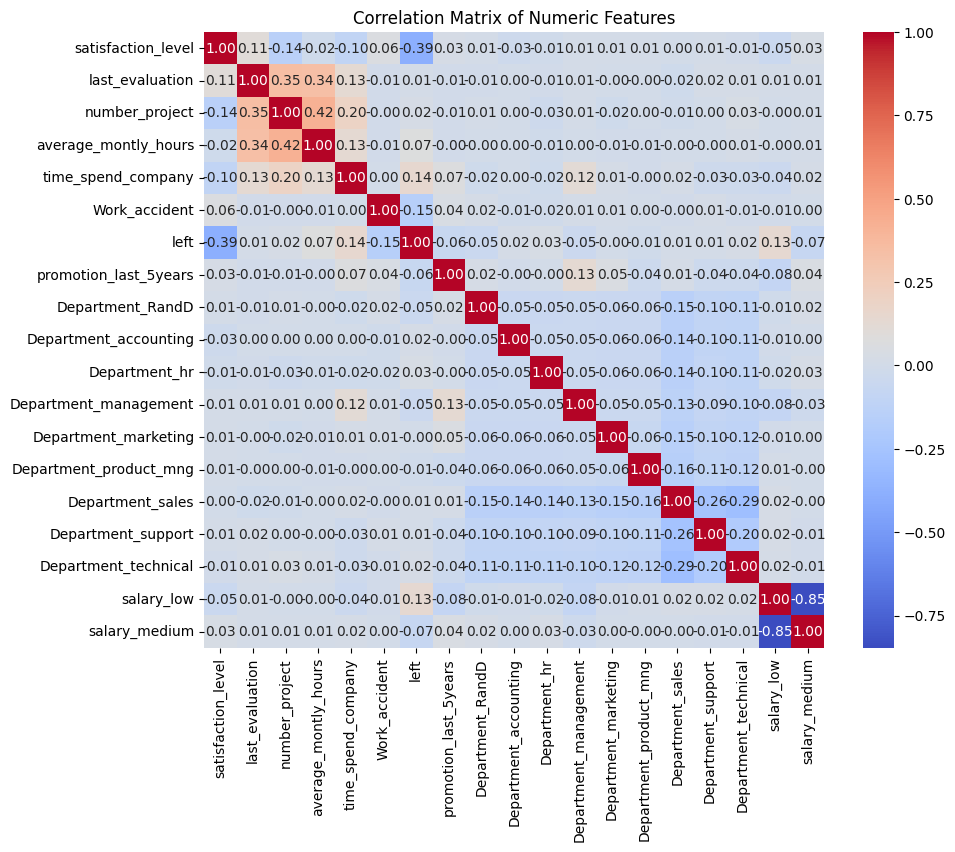

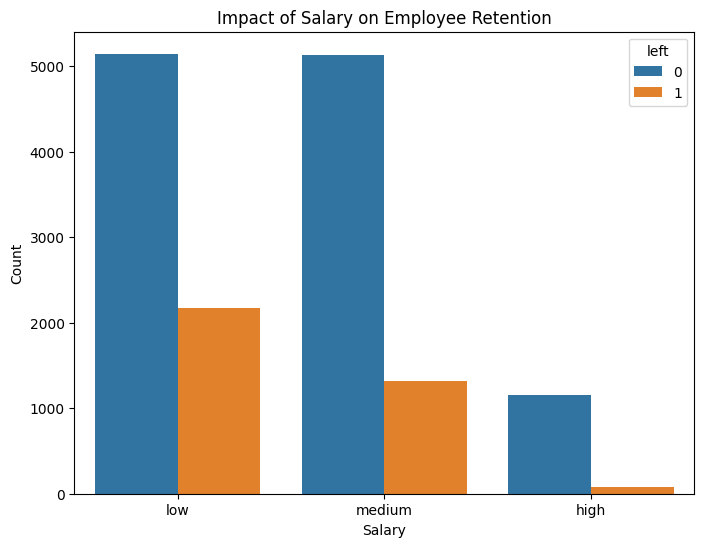

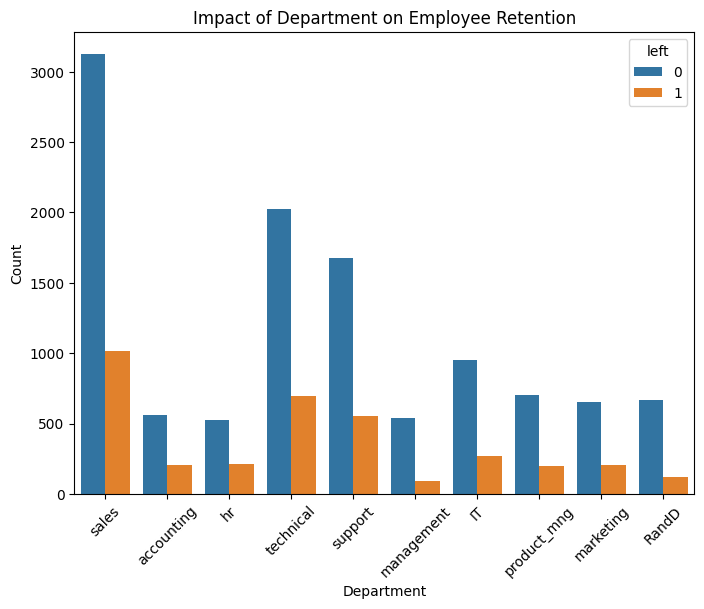

Accuracy of the Logistic Regression model: 0.76


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
hr_data = pd.read_csv("HR_comma_sep.csv")

# Step 2: Exploratory Data Analysis (EDA)
print(hr_data.info())  # Check data types and missing values
print(hr_data.describe())  # Summary statistics

# Correlation matrix to identify key variables affecting retention
hr_data_encoded = pd.get_dummies(hr_data, columns=["Department", "salary"], drop_first=True)
correlation_matrix = hr_data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Step 3: Plot bar chart showing impact of salary on retention
plt.figure(figsize=(8, 6))
sns.countplot(data=hr_data, x="salary", hue="left")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

# Step 4: Plot bar chart showing correlation between department and retention
plt.figure(figsize=(8, 6))
sns.countplot(data=hr_data, x="Department", hue="left")
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Step 5: Feature Selection
# Check available salary columns after encoding
available_features = hr_data_encoded.columns.tolist()
salary_features = [col for col in ["salary_medium", "salary_high"] if col in available_features]

# Selecting key features dynamically
selected_features = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours",
                     "time_spend_company", "Work_accident", "promotion_last_5years"] + salary_features
X = hr_data_encoded[selected_features]
y = hr_data_encoded["left"]

# Step 6: Train Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Make predictions and measure accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")


Zoo Data Columns: Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')
Zoo Classes Columns: Index(['class_type', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')
Accuracy of the Logistic Regression model: 0.95


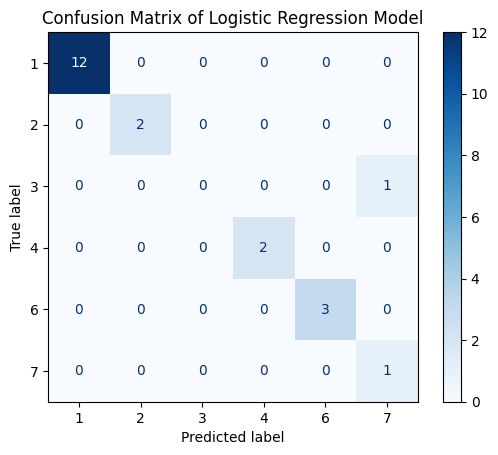

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Load datasets
zoo_data = pd.read_csv("/content/zoo-data.csv")
zoo_classes = pd.read_csv("/content/zoo-class-type.csv")

# Trim column names to remove any leading/trailing spaces
zoo_data.columns = zoo_data.columns.str.strip()
zoo_classes.columns = zoo_classes.columns.str.strip()

# Rename 'Class_Number' to 'class_type' in zoo_classes to match zoo_data
zoo_classes.rename(columns={"Class_Number": "class_type"}, inplace=True)

# Ensure 'class_type' column exists in both datasets
print("Zoo Data Columns:", zoo_data.columns)
print("Zoo Classes Columns:", zoo_classes.columns)

# Merge datasets to include class names
zoo_data = zoo_data.merge(zoo_classes, on="class_type", how="left")

# Drop unnecessary columns
if "animal_name" in zoo_data.columns:
    zoo_data = zoo_data.drop(columns=["animal_name"])  # Removing animal names as they are not useful for prediction

# Features and target variable
X = zoo_data.drop(columns=["class_type", "Class_Type", "Animal_Names", "Number_Of_Animal_Species_In_Class"])  # Features
y = zoo_data["class_type"]  # Target variable

# Standardize features for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with increased max_iter and strong regularization
model = LogisticRegression(max_iter=5000, solver='lbfgs', C=10)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

# Get unique class labels from test set
test_labels = sorted(y_test.unique())

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_labels)
display.plot(cmap='Blues')
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()
